## 参考资料

https://www.kesci.com/home/project/5bf7a281954d6e001066ac53

In [5]:
data = pd.read_csv('./creditcard.csv')
data.shape

(284807, 31)

居然没有空值，这是一件好事。

In [6]:
data.isnull().values.sum()

0

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


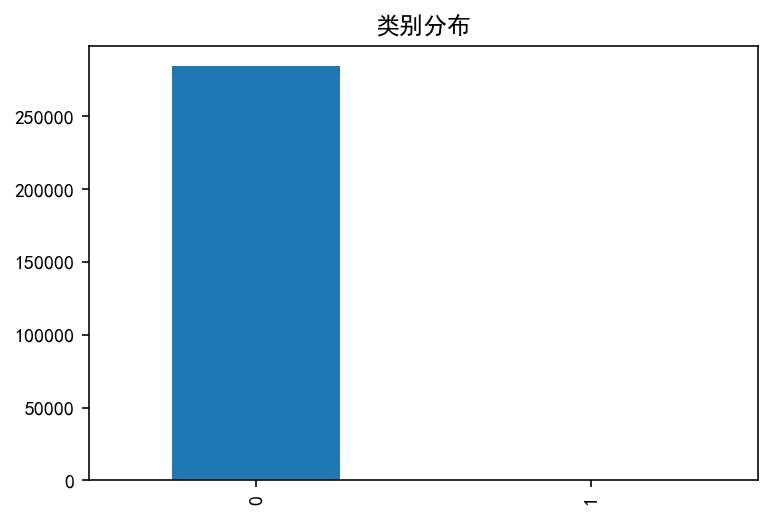

In [13]:
import matplotlib.pyplot as plt

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']

data.Class.value_counts().plot(kind='bar',title='类别分布')
plt.show()

正常交易记录有 284315 条；

异常交易记录有 492 条；

异常交易记录比率 0.173% 。

In [15]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<span class="burk">可以看出正常的交易记录是呈周期性分布的，而异常交易分布较平均。所以可以从交易周期的低频段入手欺诈交易的检测。</span>

In [17]:
from sklearn.preprocessing import StandardScaler

# reshape(-1,1) 将data['Amount']变成只有一列，行数不限定的np.array
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [18]:
print('未标准化的Amount：', data['Amount'].values.reshape(-1, 1))

未标准化的Amount： [[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]]


In [19]:
print('标准化后的Amount：',
      StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1)))

标准化后的Amount： [[ 0.24496426]
 [-0.34247454]
 [ 1.16068593]
 ...
 [-0.0818393 ]
 [-0.31324853]
 [ 0.51435531]]


In [20]:
# 删除不需要使用到的两列数据
new_data = data.drop(['Time', 'Amount'], axis=1)
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [21]:
X = np.array(new_data.iloc[:, new_data.columns != 'Class'])  # 选取特征列数据
y = np.array(new_data.iloc[:, new_data.columns == 'Class'])  # 选取类别label
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (284807, 29) 
y shape: (284807, 1)


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('训练集的交易记录条数：',X_train.shape[0])
print('测试集的交易记录条数：',X_test.shape[0])
print('交易记录总数：',X_train.shape[0] + X_test.shape[0])
print('上采样前，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train==1),sum(y_train==0)))
print('------------------------')

# 对训练集进行上采样处理
smote = SMOTE(random_state=2)
X_train_os,y_train_os = smote.fit_sample(X_train, y_train.ravel()) # ravel(): change the shape of y to (n_samples, )

print('上采样后，训练集的交易记录条数：', len(X_train_os))
print('其中，训练集X的shape:',X_train_os.shape,'，y的shape:',y_train_os.shape)
print('交易记录总数：',X_train_os.shape[0] + X_test.shape[0])
print('上采样后，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train_os==1),sum(y_train_os==0)))

训练集的交易记录条数： 199364
测试集的交易记录条数： 85443
交易记录总数： 284807
上采样前，类别为‘1’的共有[345]个，类别为‘0’的共有[199019]个。
------------------------
上采样后，训练集的交易记录条数： 398038
其中，训练集X的shape: (398038, 29) ，y的shape: (398038,)
交易记录总数： 483481
上采样后，类别为‘1’的共有199019个，类别为‘0’的共有199019个。


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, auc, recall_score, classification_report


In [25]:
# 定义正则化权重参数，用以控制过拟合
paramaters = {'C':np.linspace(1,10, num=10)} # generate sequnce: start = 1, stop = 10
paramaters
# C_param_range = [0.01,0.1,1,10,100]

{'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}

In [26]:
lr = LogisticRegression()
# 5 folds, 3 jobs run in parallel
lr_clf = GridSearchCV(lr, paramaters, cv=5, n_jobs=3, verbose=5) 
lr_clf.fit(X_train_os, y_train_os.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   31.3s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.2min finished
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [27]:
print('最好的参数：',lr_clf.best_params_)

最好的参数： {'C': 4.0}


In [28]:
lr1 = LogisticRegression(C=4, penalty='l1',verbose=5)
lr1.fit(X_train_os, y_train_os.ravel())

[LibLinear]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [29]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')